# Generate changepoints in time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from badgers.generators.time_series.changepoints import RandomChangeInMeanGenerator

## Setup random generator

In [2]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Generate data (gaussian white noise)

In [3]:
X = rng.normal(size=100, scale=0.25)
t = np.arange(100)

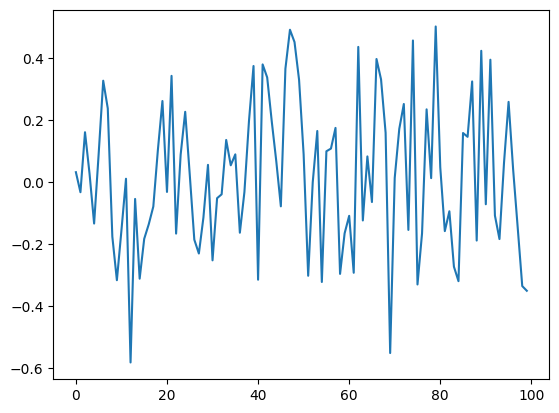

In [4]:
plt.plot(t, X)

## Randomly generate changepoints

In [5]:
generator = RandomChangeInMeanGenerator(max_change=2, min_change=-2, n_changepoints=5, random_generator=rng)

In [6]:
Xt, _ = generator.generate(X, None)

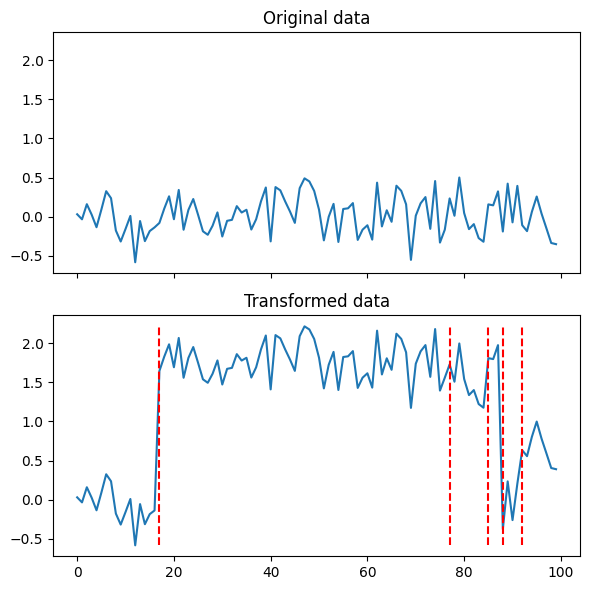

In [7]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
for cpt in generator.changepoints:
    axes[1].vlines(cpt[0], ymin=Xt.min(), ymax=Xt.max(), ls='--', color='r')
plt.tight_layout();